In [1]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1

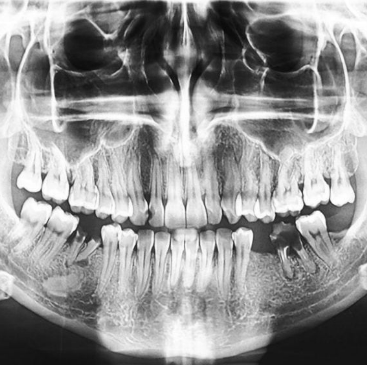

In [2]:
zeby_image = Image.open("zeby.png")
zeby_image = zeby_image.convert("L")
zeby_image

# Zadanie 2

In [3]:
def histogram_norm(image):
    hist = image.histogram()
    total_pixels = sum(hist)
    hist_norm = [h / total_pixels for h in hist]
    return hist_norm

In [4]:
def histogram_cumul(image):
    hist_norm = histogram_norm(image)
    hist_cumul = np.cumsum(hist_norm)
    return hist_cumul

In [5]:
def histogram_equalization(image):
    hist_cumul = histogram_cumul(image)
    lut = [int(255 * h) for h in hist_cumul]  
    image_eq = image.point(lut)  
    return image_eq

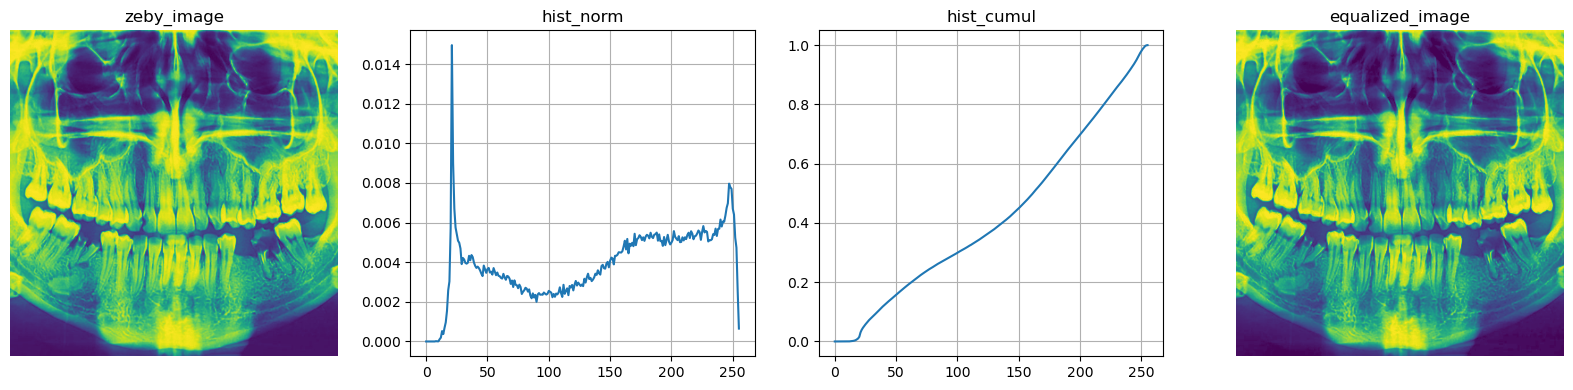

In [6]:
hist_norm = histogram_norm(zeby_image)
hist_cumul = histogram_cumul(zeby_image)
equalized_image = histogram_equalization(zeby_image)

equalized_image.save("equalized.png")

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(zeby_image)
ax[0].set_title("zeby_image")
ax[0].axis("off")

ax[1].plot(hist_norm)
ax[1].set_title("hist_norm")
ax[1].grid(True)

ax[2].plot(hist_cumul)
ax[2].set_title("hist_cumul")
ax[2].grid(True)

ax[3].imshow(equalized_image)
ax[3].set_title("equalized_image")
ax[3].axis("off")

plt.tight_layout()
plt.savefig('fig1.png')
plt.show()


# Zadanie 3

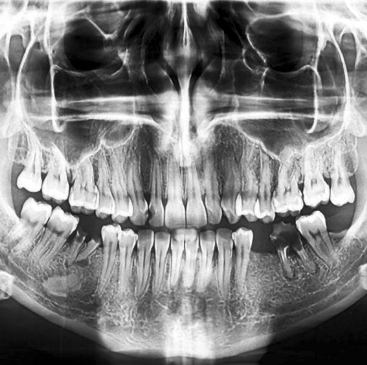

In [7]:
zeby_equalized = ImageOps.equalize(zeby_image, mask = None)
zeby_equalized.save("equalized1.png")
zeby_equalized 

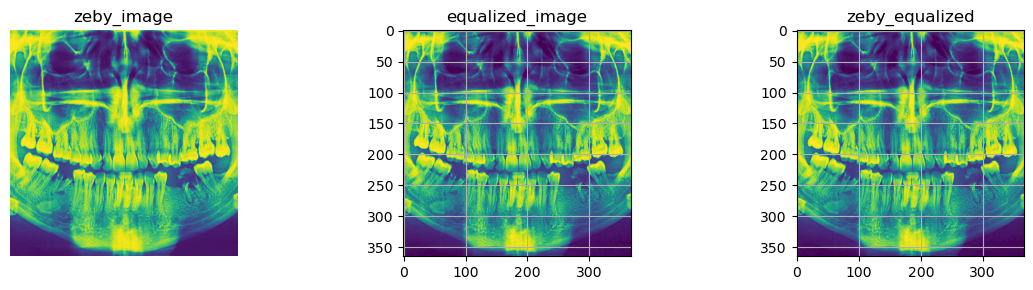

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

ax[0].imshow(zeby_image)
ax[0].set_title("zeby_image")
ax[0].axis("off")

ax[1].imshow(equalized_image)
ax[1].set_title("equalized_image")
ax[1].grid(True)

ax[2].imshow(zeby_equalized)
ax[2].set_title("zeby_equalized")
ax[2].grid(True)


plt.tight_layout()
plt.savefig('fig2.png')
plt.show()

Własna funkcja histogram_equalization działa prościej, bazując na histogramie i skumulowanym rozkładzie wartości pikseli. Efekt może być nieco bardziej "szorstki", szczególnie dla obrazów kolorowych.
ImageOps.equalize stosuje bardziej zaawansowane podejście, zapewniając precyzyjniejsze wyrównanie kontrastu, zwłaszcza w przypadku obrazów RGB.

# Zadanie 4

In [9]:
def konwertuj1(image, w_r, w_g, w_b):
    if image.mode != 'RGB':
        raise ValueError("Obraz musi być w trybie RGB")
    if not (0 <= w_r <= 1 and 0 <= w_g <= 1 and 0 <= w_b <= 1):
        raise ValueError("Wagi muszą mieścić się w przedziale [0, 1]")
    if not (abs(w_r + w_g + w_b - 1) < 1e-6):
        raise ValueError("Suma wag w_r, w_g, w_b musi być równa 1")
    
    r, g, b = [np.array(channel) for channel in image.split()]
    
    l = np.round(r * w_r + g * w_g + b * w_b).astype(np.uint8)
    
    return Image.fromarray(l, mode='L')


def konwertuj2(image, w_r, w_g, w_b):
    if image.mode != 'RGB':
        raise ValueError("Obraz musi być w trybie RGB")
    if not (0 <= w_r <= 1 and 0 <= w_g <= 1 and 0 <= w_b <= 1):
        raise ValueError("Wagi muszą mieścić się w przedziale [0, 1]")
    if not (abs(w_r + w_g + w_b - 1) < 1e-6):
        raise ValueError("Suma wag w_r, w_g, w_b musi być równa 1")
    
    r, g, b = [np.array(channel) for channel in image.split()]
    
    l = (r * w_r + g * w_g + b * w_b).astype(np.uint8)
    
    return Image.fromarray(l, mode='L')



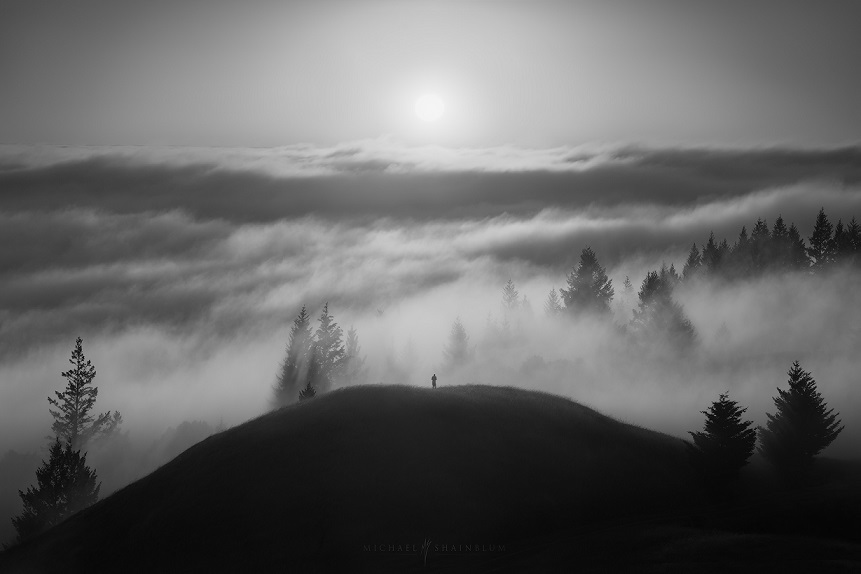

In [10]:
mgla = Image.open("mgla.jpg")

w_r, w_g, w_b = 0.299, 0.587, 0.114

image_L1 = konwertuj1(mgla, w_r, w_g, w_b)
image_L1.save("mgla_L1.png")

mgla_L = mgla.convert('L')
mgla_L.save("mgla_L.png")

image_L2 = konwertuj2(mgla, w_r, w_g, w_b)
image_L2.save("mgla_L2.png")

image_L1

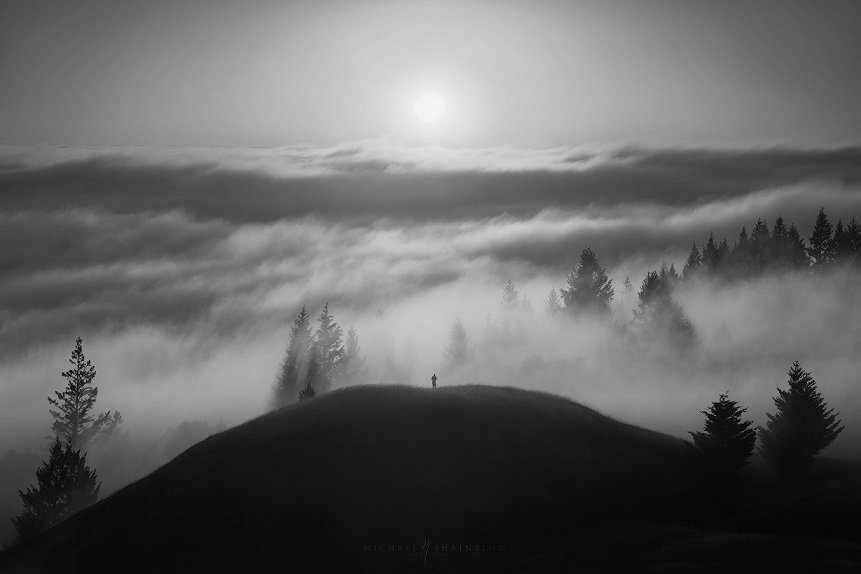

In [11]:
image_L2

In [12]:
from PIL import ImageStat as stat

def porownaj_obrazy(image1 :Image, image2: Image):
    im1_tab = np.asarray(image1)
    im2_tab = np.asarray(image2)
    
    im1_stat = stat.Stat(image1)
    im2_stat = stat.Stat(image2)
    difference = {
        'mode':(image1.mode == image2.mode),
        'size': (image1.size == image2.size),
        'format':(image1.format == image2.format),
        'extrema':(im1_stat.extrema == im2_stat.extrema),
        'count':(im1_stat.count == im2_stat.count),
        'mean':(im1_stat.mean == im2_stat.mean),
        'median':(im1_stat.median == im2_stat.median),
        'stddev':(im1_stat.stddev == im2_stat.stddev),
        'typ danych tablicy':(im1_tab.dtype == im2_tab.dtype),
        'rozmiar tablicy':(im1_tab.shape == im2_tab.shape),
        'liczba elementow':(im1_tab.size == im2_tab.size),
        'wymiar tablicy':(im1_tab.ndim == im2_tab.ndim),  
    }
    return difference

porownaj_obrazy(mgla_L,image_L1)

{'mode': True,
 'size': True,
 'format': True,
 'extrema': True,
 'count': True,
 'mean': False,
 'median': True,
 'stddev': False,
 'typ danych tablicy': True,
 'rozmiar tablicy': True,
 'liczba elementow': True,
 'wymiar tablicy': True}

Różnica między obrazami **mgla_L.png** i **mgla_L1.png** wynika z różnych metod zaokrąglania intensywności pikseli:

- **`Image.convert('L')`**: Używa standardowego algorytmu ITU-R 601-2, uwzględniając precyzyjne operacje matematyczne, takie jak transformacja gamma czy interpolacja.
- **`konwertuj1`**: Oblicza sumę ważoną pikseli z zaokrągleniem przez **`round()`**, co wprowadza subtelne różnice w wartościach pikseli.

Efekt to minimalne różnice w histogramie, medianie i wartościach pikseli.

In [13]:
porownaj_obrazy(image_L1, image_L2)

{'mode': True,
 'size': True,
 'format': True,
 'extrema': False,
 'count': True,
 'mean': False,
 'median': True,
 'stddev': False,
 'typ danych tablicy': True,
 'rozmiar tablicy': True,
 'liczba elementow': True,
 'wymiar tablicy': True}

Różnica między obrazami **mgla_L1.png** i **mgla_L2.png** wynika z metody przetwarzania wartości pikseli:

- **`konwertuj1` (round)**: Zaokrągla wartości pikseli do najbliższej liczby całkowitej, co lepiej oddaje proporcje intensywności.
- **`konwertuj2` (int)**: Obcina wartości (zaokrągla w dół), co powoduje systematyczne zmniejszenie jasności pikseli.

Efekt: Obraz **mgla_L2.png** jest ciemniejszy i ma większe różnice w ekstremach oraz średniej w porównaniu do **mgla_L1.png**.